**PRÁCTICA PROGRAMACIÓN**

**1. Importación de los datos**

Un fichero de datos se ha colocado en el área de recursos, dentro de la carpeta con nombre "Práctica". Se ha de importar el fichero excel (primera hoja) que contiene datos de ligas europeas de fútbol de este año. Los campos relevantes de dicho set de datos son:

**'Date'**: contiene la fecha de cada partido.

**'HTHG'**: Goles marcados por el equipo de casa en el descanso ('Half time')

**'HTAG'**: Igual que el anterior pero para el equipo de fuera.

**'FTHG'**: Goles marcados por el equipo de casa al final del partido ('Full time')

**'FTAG'**: Igual que el anterior para el equipo de fuera.

Una vez realizada la lectura de los datos e inserción en un dataframe pandas se ha de convertir la variable **'Date'** a formato datetime.


In [1]:
#Importación de los datos
import pandas as pd

file = pd.read_excel('all-euro-data-2020-2021.xlsx')
print(file)


    Div       Date      Time          HomeTeam        AwayTeam  FTHG  FTAG  \
0    E0 2020-09-12  12:30:00            Fulham         Arsenal     0     3   
1    E0 2020-09-12  15:00:00    Crystal Palace     Southampton     1     0   
2    E0 2020-09-12  17:30:00         Liverpool           Leeds     4     3   
3    E0 2020-09-12  20:00:00          West Ham       Newcastle     0     2   
4    E0 2020-09-13  14:00:00         West Brom       Leicester     0     3   
..   ..        ...       ...               ...             ...   ...   ...   
375  E0 2021-05-23  16:00:00         Liverpool  Crystal Palace     2     0   
376  E0 2021-05-23  16:00:00          Man City         Everton     5     0   
377  E0 2021-05-23  16:00:00  Sheffield United         Burnley     1     0   
378  E0 2021-05-23  16:00:00          West Ham     Southampton     3     0   
379  E0 2021-05-23  16:00:00            Wolves      Man United     1     2   

    FTR  HTHG  HTAG  ... AvgC<2.5  AHCh  B365CAHH  B365CAHA  PC

In [2]:
#Nos quedamos sólo con los campos relevantes del set
columns = ['Date', 'HTHG', 'HTAG', 'FTHG', 'FTAG']
df_league = file[columns]
print(df_league)

          Date  HTHG  HTAG  FTHG  FTAG
0   2020-09-12     0     1     0     3
1   2020-09-12     1     0     1     0
2   2020-09-12     3     2     4     3
3   2020-09-12     0     0     0     2
4   2020-09-13     0     0     0     3
..         ...   ...   ...   ...   ...
375 2021-05-23     1     0     2     0
376 2021-05-23     2     0     5     0
377 2021-05-23     1     0     1     0
378 2021-05-23     2     0     3     0
379 2021-05-23     1     2     1     2

[380 rows x 5 columns]


In [3]:
#Cambiamos el tipo de la columna Date
df_league.Date = pd.to_datetime(df_league.Date)
print(df_league.dtypes)

Date    datetime64[ns]
HTHG             int64
HTAG             int64
FTHG             int64
FTAG             int64
dtype: object


C:\Users\juanh\Anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**2. Formamos una serie temporal en formato pd.Series (1 punto)**

Se elige la variable **'FTHG'** y se forma una serie temporal siguiendo los siguientes pasos:

- Se agrega la información en un nuevo dataframe pandas usando groupby, y agregando por variable **'Date'**, promediando los valores del resto de variables.

- Formamos una serie pandas con el constructor pd.Series() a partir del filtro que hagamos para la variable **'FTHG'** en el dataframe agrupado por fecha. Es decir, realizamos un filtro para capturar en el dataframe unicamente la información de la variable **'FTHG'**.

Los valores de ese filtro han de pasarse al constructor pd.Series(). Hay que comprobar que la naturaleza del objeto resultante es pd.Series, para que no de errores en las librerías que vamos a usar posteriormente.

In [4]:
#Creamos el nuevo df (agregando por 'Date' y promediando por el resto)
df_league_agg = df_league.groupby('Date').mean()
print(df_league_agg)

                HTHG      HTAG      FTHG      FTAG
Date                                              
2020-09-12  1.000000  0.750000  1.250000  2.000000
2020-09-13  0.000000  0.000000  0.000000  2.000000
2020-09-14  0.000000  1.500000  0.500000  2.500000
2020-09-19  1.250000  1.000000  3.000000  2.250000
2020-09-20  0.500000  1.000000  1.500000  3.000000
...              ...       ...       ...       ...
2021-05-15  0.333333  0.333333  1.333333  2.000000
2021-05-16  0.750000  1.000000  1.500000  1.250000
2021-05-18  0.250000  0.250000  1.500000  1.500000
2021-05-19  0.500000  0.833333  0.833333  1.833333
2021-05-23  1.100000  0.400000  2.100000  1.000000

[135 rows x 4 columns]


In [5]:
#Filtramos por la variable 'FTHG'
column = 'FTHG'
df_league_FTHG = df_league_agg[column]
print(df_league_FTHG)


Date
2020-09-12    1.250000
2020-09-13    0.000000
2020-09-14    0.500000
2020-09-19    3.000000
2020-09-20    1.500000
                ...   
2021-05-15    1.333333
2021-05-16    1.500000
2021-05-18    1.500000
2021-05-19    0.833333
2021-05-23    2.100000
Name: FTHG, Length: 135, dtype: float64


In [6]:
#Formamos una serie con el constructor pd.Series()
df_league_series = pd.Series(df_league_FTHG)
print(df_league_series)

Date
2020-09-12    1.250000
2020-09-13    0.000000
2020-09-14    0.500000
2020-09-19    3.000000
2020-09-20    1.500000
                ...   
2021-05-15    1.333333
2021-05-16    1.500000
2021-05-18    1.500000
2021-05-19    0.833333
2021-05-23    2.100000
Name: FTHG, Length: 135, dtype: float64


In [7]:
#Comprobamos que el tipo sea pd.Series()
type(df_league_series)

pandas.core.series.Series

**3. Creamos una función que haga la descomposición trend, seasonal y residuo (2 puntos)**

Dicha función ha de hacer la descomposición en tres señales **(trend, seasonal y residuo)** de una serie temporal. La función tendrá un parámetro (la serie temporal) y devolverá como  resultado **[trend,season,resid]** las tres componentes. Adicionalmente dibujará dentro de la función dichas componentes.

Guia: añadid a la función decompose el parámetro freq=7:

**decompose(ts,freq=7)** donde ts es la serie temporal. El archivo no tiene un muestreo cte, con esto le estamos diciendo que queremos un muestreo semanal. Sin ese parámetro la función dará error debido a un muestreo no cte.

Dentro de la función eliminad los nulos generados en la descomposición antes de devolver las señales a la salida. Si no se limpian los nulos funciones posteriores darán error.

C:\Users\juanh\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\juanh\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


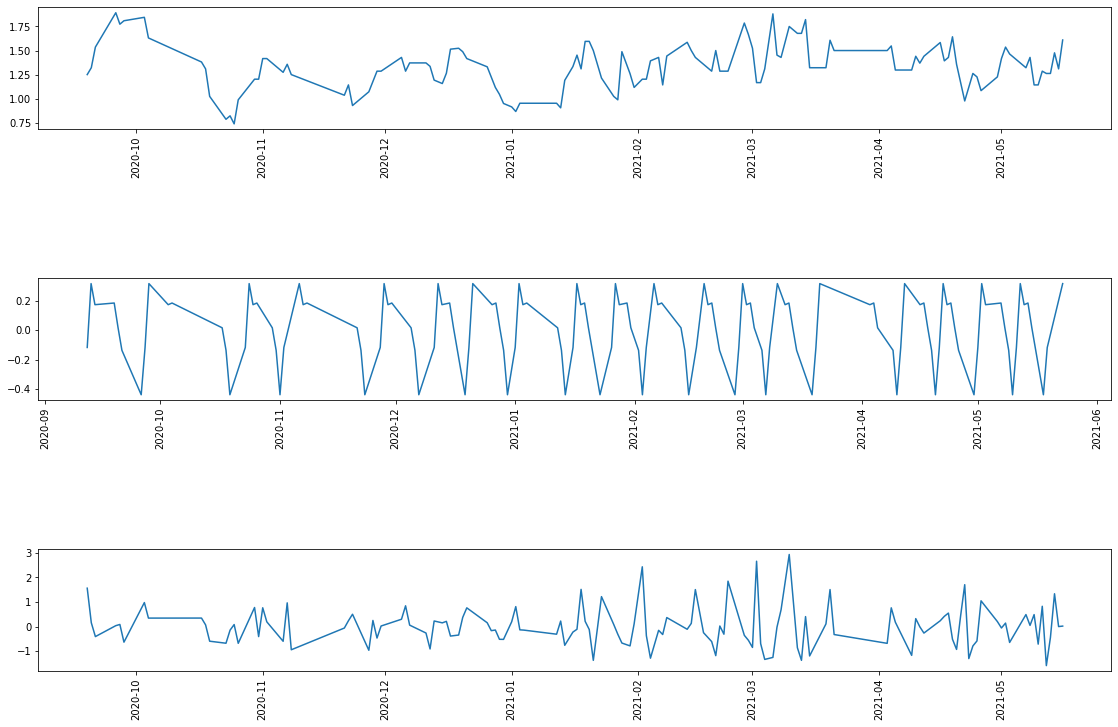

In [8]:
#Importamos el módulo necesario para la descomposición en trend, season y residue
from statsmodels.tsa.seasonal import seasonal_decompose

#Importamos el módulo para hacer subplots
import matplotlib.pyplot as plt

#Falta eliminar los nulos!!!!

#Creamos la función decompose 
#El valor de freq será 7 (muestreo semanal)
def decompose(ts, freq):
  decomposition = seasonal_decompose(ts, freq=freq)
  trend = decomposition.trend
  season = decomposition.seasonal
  residue = decomposition.resid

  plt.figure(figsize=(18, 12))

  plt.subplot(311)
  plt.xticks(rotation=90)
  plt.plot(trend)
  plt.tight_layout(pad=10.0)

  plt.subplot(312)
  plt.xticks(rotation=90)
  plt.plot(season)

  plt.subplot(313)
  plt.xticks(rotation=90)
  plt.plot(residue)

  return trend, season, residue

#Probamos la función
frequency = 7
(trend, season, residue) = decompose(df_league_series, frequency)


**4. Aplicamos la función a la variable 'FTHG' (1 punto)**

Una vez construida la función del punto anterior se aplicará dicha función a la serie temporal que habíamos construido con la variable **'FTHG'**.

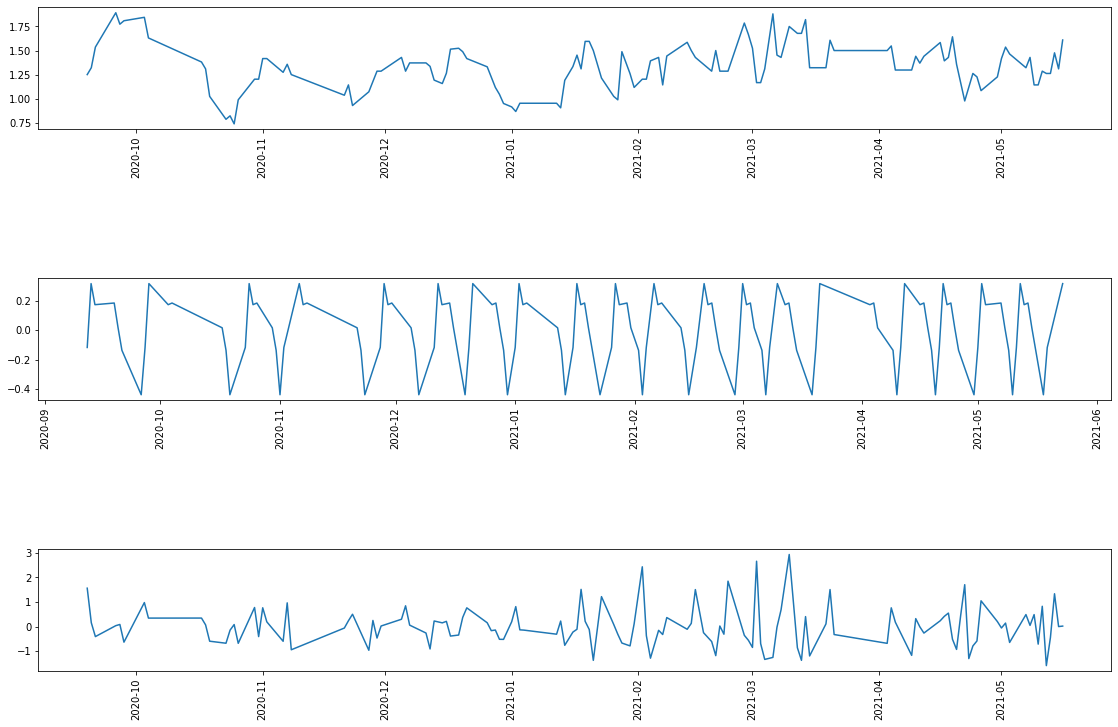

In [9]:
#Inicializamos la frecuencia a 7 (muestreo semanal) y aplicamos la función a FTHG
frequency = 7
(trend, season, residue) = decompose(df_league_series, frequency)


**5. Aplicamos el test df al residuo para ver si es estacionario (1 punto)**

Como la función ejecutada devuelte, entre otras, la componente resíduo debemos utilizar esa señal que nos ha dado la función para aplicar el **test DF** (Dickey-Fuller)

Contestar si es estacionario y justificar la respuesta.

**JUAN: Habéis cometido dos errores serios: Por un lado estáis aplicando el test a la serie completa cuando deberíais aplicarlo al residuo. Por otro lado al residuo había que eliminarle los valores nulos, ya que siempre quedan valores nulos al descomponer.**

In [11]:
#ADF Test
import statsmodels.tsa.stattools as stattools

result = stattools.adfuller(df_league_series, autolag='AIC')
result = stattools.adfuller(df_league_series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 


ADF Statistic: -5.667679776221468
n_lags: 9.072360842069333e-07
p-value: 9.072360842069333e-07
Critial Values:
   1%, -3.4825006939887997
Critial Values:
   5%, -2.884397984161377
Critial Values:
   10%, -2.578960197753906


Como en este caso nuestro p-valor = 9,07e-7 y es menor que 0,05 (nivel de significancia elegido para el estudio) rechazamos la hipótesis nula de no-estacionario, por lo tanto la serie es estacionaria.

**6. Aplicamos la misma metodología a la feature 'FTAG' (1 punto)**

Es decir formamos una nueva serie temporal, descomponemos en tres señales y aplicamos el test df.

Todo el código es idéntico a lo que se ha hecho hasta este momento, salvo por el hecho de que ahora hay que hacer el filtro para una variable distinta en el punto 2.

Date
2020-09-12    2.000000
2020-09-13    2.000000
2020-09-14    2.500000
2020-09-19    2.250000
2020-09-20    3.000000
                ...   
2021-05-15    2.000000
2021-05-16    1.250000
2021-05-18    1.500000
2021-05-19    1.833333
2021-05-23    1.000000
Name: FTAG, Length: 135, dtype: float64
Date
2020-09-12    2.000000
2020-09-13    2.000000
2020-09-14    2.500000
2020-09-19    2.250000
2020-09-20    3.000000
                ...   
2021-05-15    2.000000
2021-05-16    1.250000
2021-05-18    1.500000
2021-05-19    1.833333
2021-05-23    1.000000
Name: FTAG, Length: 135, dtype: float64


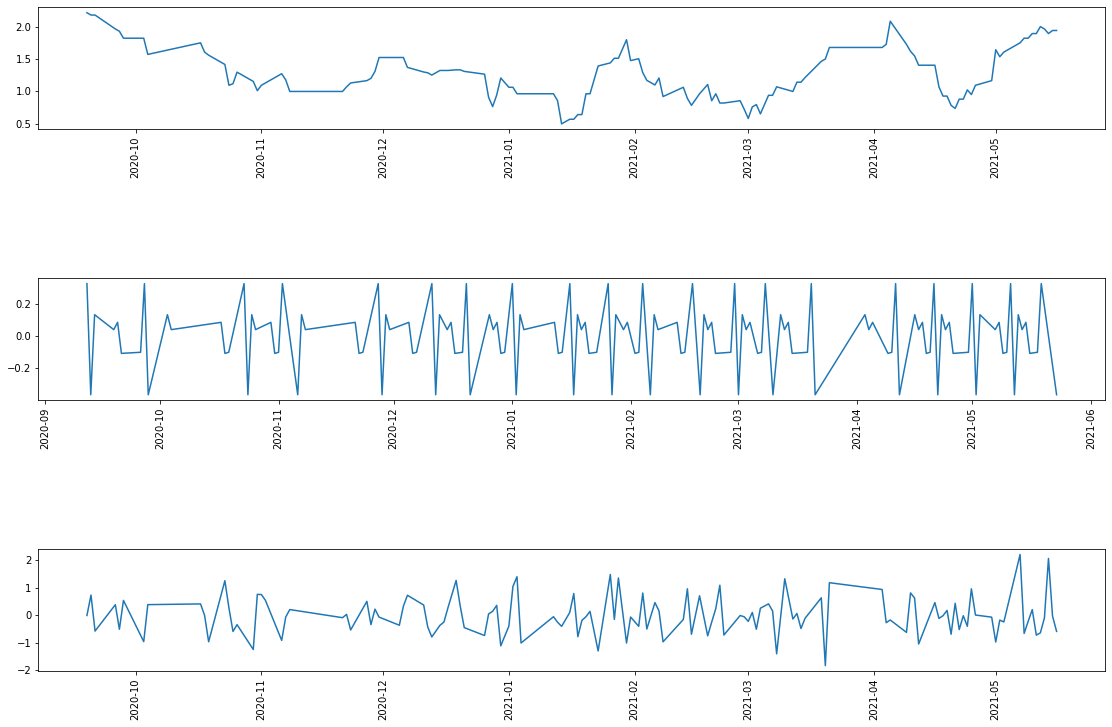

In [12]:
#Filtramos por la variable 'FTAG'
column = 'FTAG'
df_league_FTAG = df_league_agg[column]
print(df_league_FTAG)

#Formamos una serie con el constructor pd.Series()
df_league_series = pd.Series(df_league_FTAG)
print(df_league_series)

#Inicializamos la frecuencia a 7 (muestreo semanal) y aplicamos la función a FTAG
frequency = 7
(trend, season, residue) = decompose(df_league_series, frequency)

**7. Aplicamos la misma metodología a las features 'HTHG' y  'HTAG' (1 punto)**

Igual que el anterior, pero ahora aplicando el código a los goles marcados en el descanso.

**JUAN:: Seguís aplicando el test a la serie global en vez de al residuo**

Date
2020-09-12    1.000000
2020-09-13    0.000000
2020-09-14    0.000000
2020-09-19    1.250000
2020-09-20    0.500000
                ...   
2021-05-15    0.333333
2021-05-16    0.750000
2021-05-18    0.250000
2021-05-19    0.500000
2021-05-23    1.100000
Name: HTHG, Length: 135, dtype: float64
Date
2020-09-12    1.000000
2020-09-13    0.000000
2020-09-14    0.000000
2020-09-19    1.250000
2020-09-20    0.500000
                ...   
2021-05-15    0.333333
2021-05-16    0.750000
2021-05-18    0.250000
2021-05-19    0.500000
2021-05-23    1.100000
Name: HTHG, Length: 135, dtype: float64
ADF Statistic: -8.46302264208615
n_lags: 1.5488881800387083e-13
p-value: 1.5488881800387083e-13
Critial Values:
   1%, -3.481281802271349
Critial Values:
   5%, -2.883867891664528
Critial Values:
   10%, -2.5786771965503177


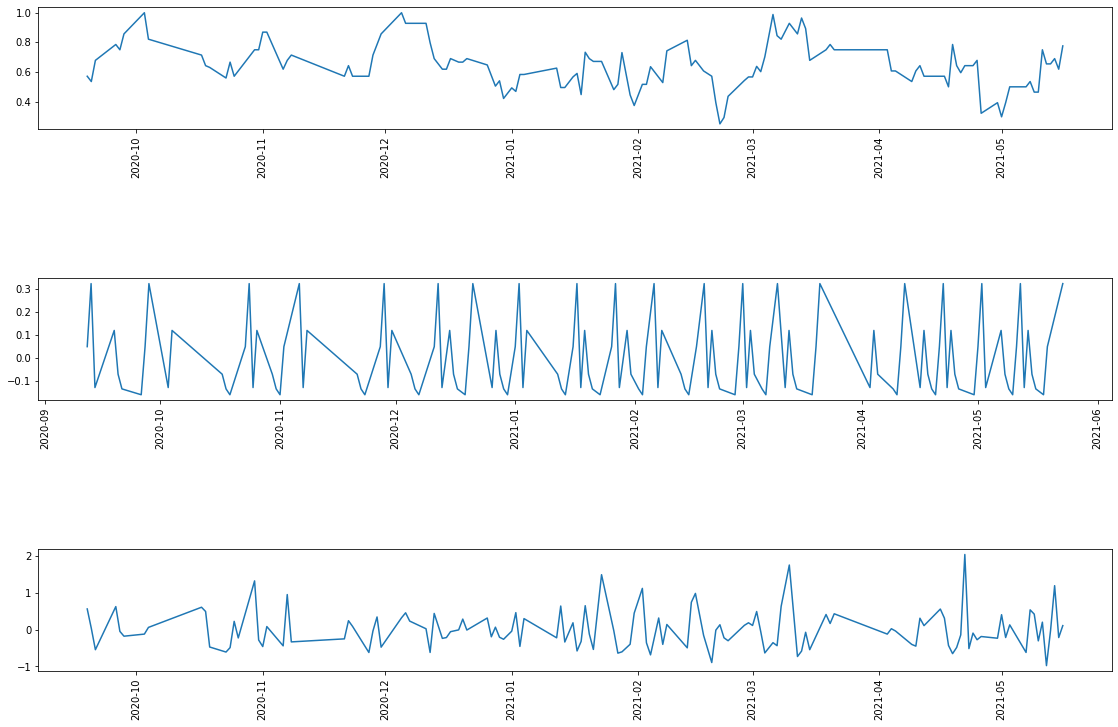

In [13]:
#Filtramos por la variable 'HTHG'
column = 'HTHG'
df_league_HTHG = df_league_agg[column]
print(df_league_HTHG)

#Formamos una serie con el constructor pd.Series()
df_league_series = pd.Series(df_league_HTHG)
print(df_league_series)

#Inicializamos la frecuencia a 7 (muestreo semanal) y aplicamos la función a HTHG
frequency = 7
(trend, season, residue) = decompose(df_league_series, frequency)

#Test ADF
result = stattools.adfuller(df_league_series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

Date
2020-09-12    0.750000
2020-09-13    0.000000
2020-09-14    1.500000
2020-09-19    1.000000
2020-09-20    1.000000
                ...   
2021-05-15    0.333333
2021-05-16    1.000000
2021-05-18    0.250000
2021-05-19    0.833333
2021-05-23    0.400000
Name: HTAG, Length: 135, dtype: float64
Date
2020-09-12    0.750000
2020-09-13    0.000000
2020-09-14    1.500000
2020-09-19    1.000000
2020-09-20    1.000000
                ...   
2021-05-15    0.333333
2021-05-16    1.000000
2021-05-18    0.250000
2021-05-19    0.833333
2021-05-23    0.400000
Name: HTAG, Length: 135, dtype: float64


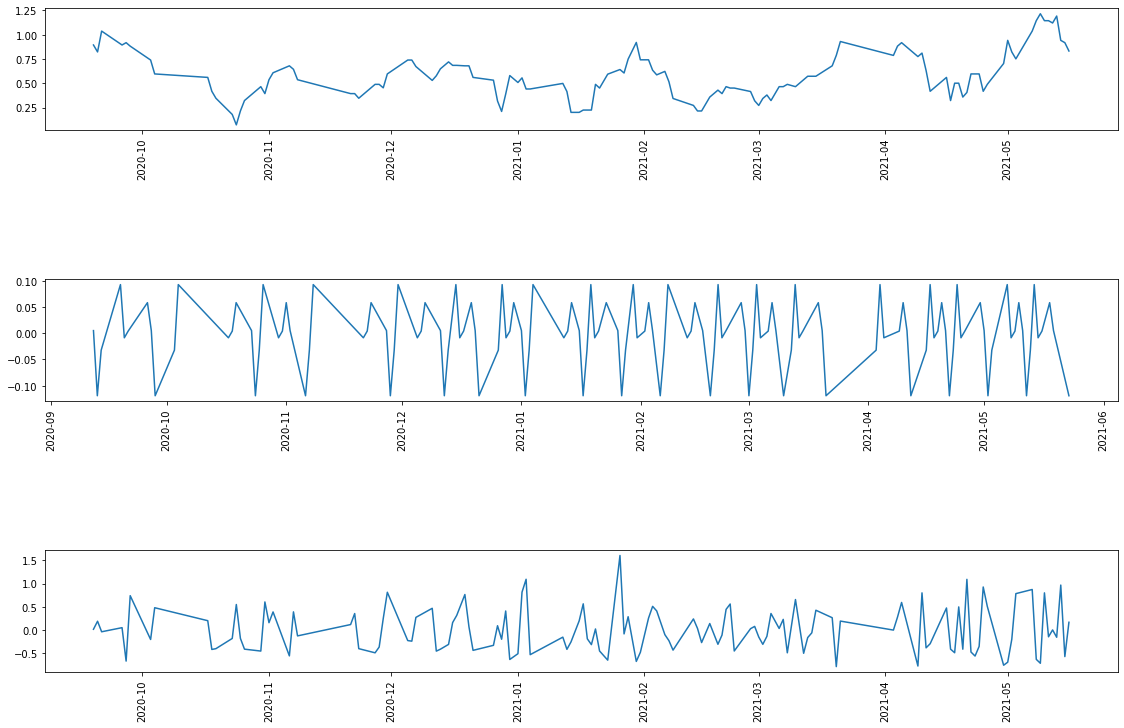

In [14]:
#Filtramos por la variable 'HTAG'
column = 'HTAG'
df_league_HTAG = df_league_agg[column]
print(df_league_HTAG)

#Formamos una serie con el constructor pd.Series()
df_league_series = pd.Series(df_league_HTAG)
print(df_league_series)

#Inicializamos la frecuencia a 7 (muestreo semanal) y aplicamos la función a HTAG
frequency = 7
(trend, season, residue) = decompose(df_league_series, frequency)

**JUAN:**

**Pregunta 1: En realidad el test df debía aplicarse a los resíduos. Habéis aplicado el test a la serie completa y el resultado es incorrecto, no solo cuantitativamente por el estadístico sino porque da al contrario. Cuando se extraen los residuos de las variables al descanso y al final del partido sale que las últimas son más estacionarias**

**Dado que el resultado anterior os da cambiado me temo que las preguntas 2 y 3 serían incorrectas pues tratan de justificar el resultado contrario al correcto.**

**Las respuestas 4 y 5 serían correctas**

**8. Discusión: Contesta y justifica las siguientes cuestiones.**

**8.1. ¿Son más estacionarios los residuos de las variables a final del partido o al descanso?. Justifica tu respuesta.**  

Al hacer el test ADF a los dos residuos hemos llegado a la conclusión de que
las variables al descanso son más estacionarias que las del final.

FTHG:

n_lags: 9.072360842069418e-07

p-value: 9.072360842069418e-07

HTHG:

n_lags: 1.5488881800386914e-13

p-value: 1.5488881800386914e-13


Como el p-valor de ambas variables son menores a 0,05 podemos deducir que
ambas son estacionarias y, al ser más bajo el del descanso, sería la más estacionaria.

**8.2.¿Encuentras alguna justificación para las diferencias encontradas?. ¿Hay algún aspecto del juego que justifique aparentemente dichas diferencias?.** 
 

Posibles factores que podrían afectar a la diferencia de las variables en la segunda
mitad del partido serían por ejemplo el cansancio de los jugadores, posibles cambios
de táctica despues del descanso o cambios de jugadores. Eso haría la primera mitad
más consistente que la segunda, lo que explicaría que sea más estacionaria.

**8.3. ¿Dónde podríamos esperar mayor precisión de un modelo ARIMA, aplicado al descanso o a final del partido?.** 

Con un modelo ARIMA aplicado a estos datos, esperaríamos mayor precisión con las
variables del descanso, ya que son más estacionarias y esto permite predecir el
futuro con más seguridad.

**8.4. Si quisiéramos entrenar un modelo ARIMA, ¿sobre qué señal de la descomposición lo aplicaríamos?. Justifica tu respuesta.**

El modelo ARIMA necesita ser aplicado en una serie estacionaria. Como anteriormente hemos comproabado que los residuos son estacionarios, podríamos aplicar dicho modelo ARIMA sobre ellos.

**8.5. ¿Se te ocurre alguna forma de relacionar el concepto de estacionariedad en series temporales deportivas y la creación de un método de apuestas?**

Conociendo la estacionariedad, se pueden realizar apuestas más seguras, ya que
es más consistente las predicciones que se pueden hacer con los datos, pero tendrían
menor cuota y por tanto generarían menos dinero.